In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random
import train
import json

Loading existing model


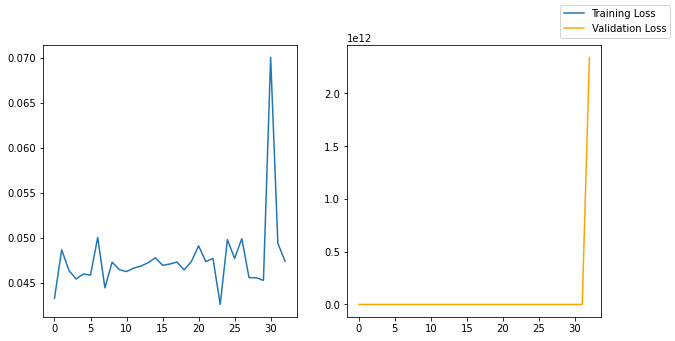

In [2]:
model_id='full_local_1'

with open(f'data/{model_id}.cfg') as f:
    configurations = json.load(f)
    
model, _, _, mean_losses, _ = train.load_model_with_config(configurations)
    
tl, vl = zip(*mean_losses)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(tl[0:], label="Training Loss")
ax2.plot(vl[0:], label="Validation Loss", color='orange')

# ax1.set_ylim(0,0.05)
# ax2.set_ylim(0,1.1)
fig.legend()
plt.show()

In [13]:
vl

(893531.2715871626, 273.4450632625596, 6410616.089016332, 138.92000672129984)

In [3]:
X_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train1.pkl')
y_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train1.pkl')

X_train_10839 = X_train[X_train.NORAD_CAT_ID == 10839]
X_train_10839_idx = X_train_10839.index

X_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test1.pkl')
y_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test1.pkl')

X_test_27944 = X_test[X_test.NORAD_CAT_ID == 27944]
X_test_27944_idx = X_test_27944.index

In [4]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

  0%|          | 0/9 [00:00<?, ?it/s]

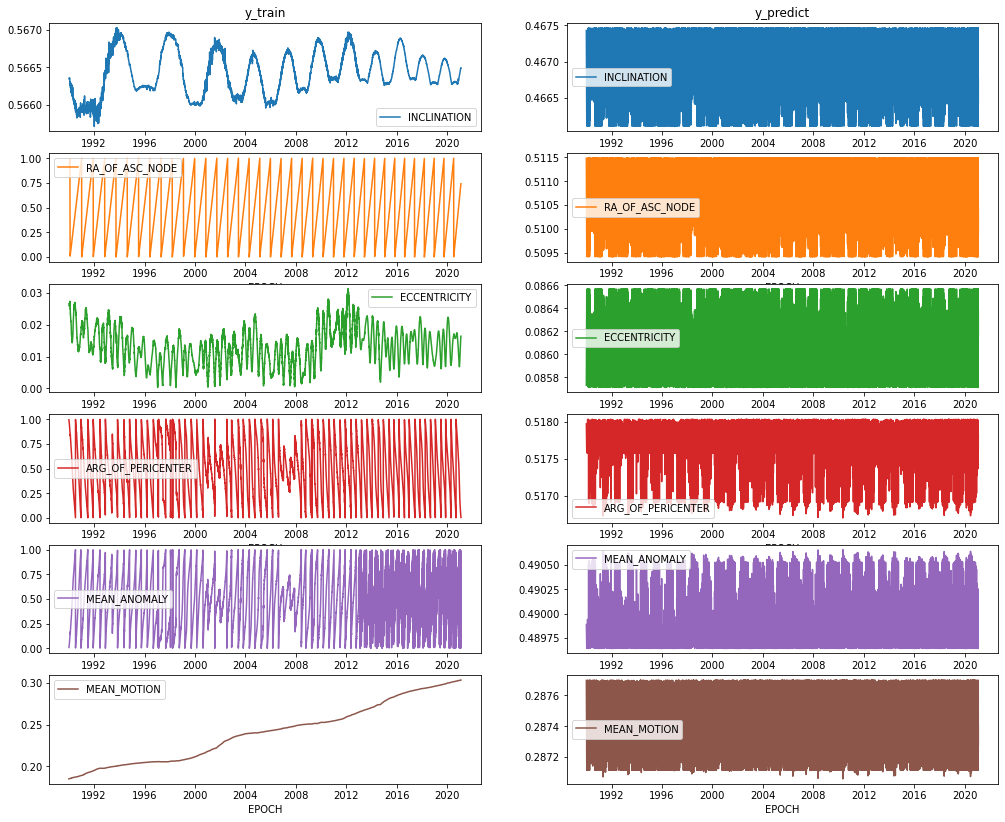

In [5]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_train_10839 = y_train.loc[X_train_10839_idx]
y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_train_10839[cols], y_train_10839[y_train.columns], device=configurations['device'])
y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

In [6]:
# X_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, title='X_test')
# plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

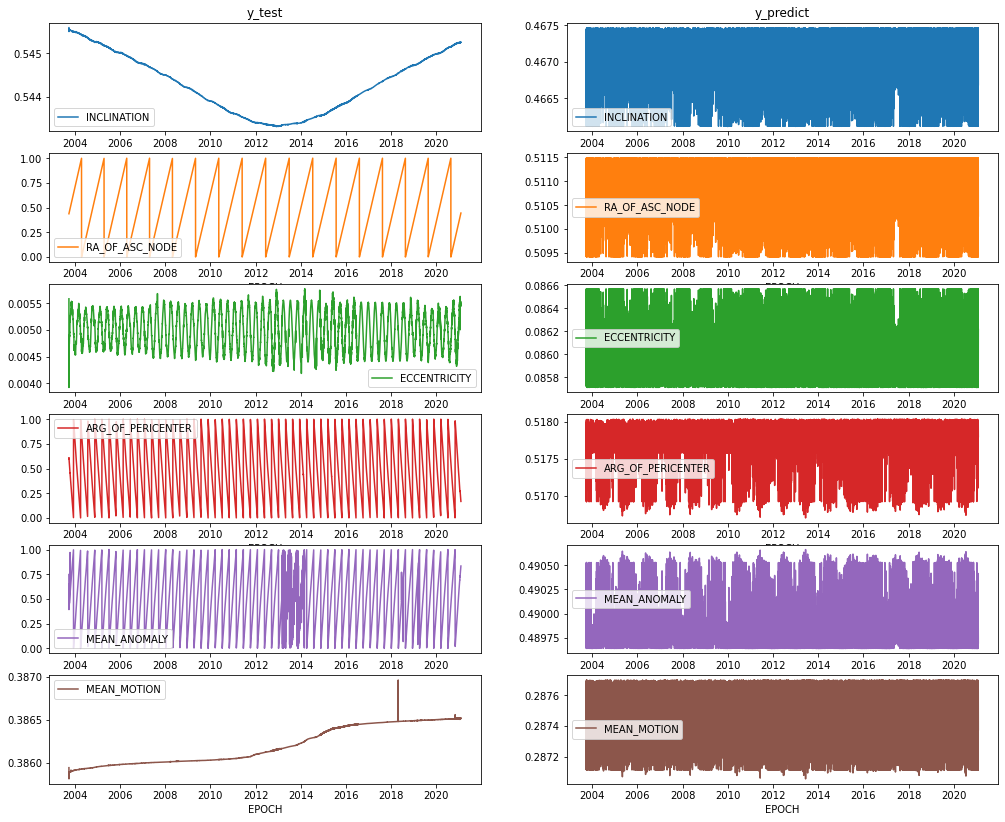

In [7]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944[y_test.columns], device=configurations['device'])
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()